# ModelNet and Thingiverse Data Visualization
In the data cards, we need to have some idea of our distribution of stuff. Let's do some visualizing!

### Imports

In [1]:
from volume_calculator import *
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
import multiprocessing as mp
from tqdm import *

### Set constants

In [2]:
DATA_DIR = '/data/csc4801/KedzioraLab'

# Had to make fixes to bowl, cup,
names = ['airplane','bookshelf','bottle','bowls','car','cone','cups','dresser','stairs','vase','table','flower_pot']

### Define Reading an STL

In [3]:
def read_stl(filename, material=2, unit='cm'):
    mySTLUtils = STLUtils()
    mySTLUtils.loadSTL(filename)
    material_mass = materialsFor3DPrinting().get_material_mass(material)
    v = mySTLUtils.volume(unit, material_mass)
    m = mySTLUtils.mass(unit, material_mass)
    a = mySTLUtils.area()
    t = mySTLUtils.triangles
    ta = mySTLUtils.areas
    return v,m,a,t,ta
util = STLUtils()

### Test

In [4]:
# read_stl(DATA_DIR+'/thingiverse/vase/stls/Decorative_Vase/vase_flower.stl')

## Evaluate Data

In [5]:
partition = 'thingiverse'
df = pd.DataFrame()

all_tags = {}
all_desc = {}
all_tris = {}
all_area = {}

for name in names[:]:
    print(name)
    all_tags[name] = []
    all_desc[name] = []
    all_tris[name] = []
    all_area[name] = []
    for folder in tqdm(glob.glob(os.path.join(DATA_DIR,partition,name,'stls','*'), recursive=True)):
        try:
            with open(folder+'/TAGS.txt') as file:
                all_tags[name] += [line.rstrip() for line in file]
            with open(folder+'/DESCRIPTIONS.txt') as file:
                all_desc[name] += [' '.join(line.rstrip() for line in file)]
        except Exception as e:
            pass
        stls = glob.glob(os.path.join(folder,'*.stl'))
        for stl in stls:
            try:
                (v,m,a,t,ta) = read_stl(stl)
                all_tris[name] += t
                all_area[name] += ta
                entry = pd.DataFrame({'class':name, 'volume':v, 'mass':m, 'area':a}, index=[0]) 
                df = pd.concat([df, entry], ignore_index=True)
            except Exception as e:
#                 print(e)
                pass

# df.to_csv(DATA_DIR+'/'+partition+'_stats.csv')

airplane


100%|██████████| 114/114 [00:43<00:00,  2.61it/s]


bookshelf


100%|██████████| 118/118 [02:33<00:00,  1.30s/it]


bottle


100%|██████████| 113/113 [01:26<00:00,  1.31it/s]


bowls


100%|██████████| 117/117 [05:42<00:00,  2.92s/it]


car


100%|██████████| 126/126 [02:44<00:00,  1.30s/it]


cone


100%|██████████| 116/116 [03:55<00:00,  2.03s/it]


cups


100%|██████████| 118/118 [05:34<00:00,  2.84s/it]


dresser


100%|██████████| 119/119 [04:39<00:00,  2.35s/it]


stairs


100%|██████████| 115/115 [11:00<00:00,  5.74s/it] 


vase


100%|██████████| 109/109 [10:15<00:00,  5.64s/it]


table


100%|██████████| 119/119 [05:52<00:00,  2.96s/it]


flower_pot


100%|██████████| 106/106 [09:04<00:00,  5.13s/it]


In [6]:
# partition = 'thingiverse'

# def get_name(both):
#     (i,name) = both
#     df = pd.DataFrame()
#     all_tags = []
#     all_desc = []
#     all_tris = []
#     all_area = []
#     for folder in tqdm(glob.glob(os.path.join(DATA_DIR,partition,name,'stls','*'), recursive=True),position=i):
#         try:
#             with open(folder+'/TAGS.txt') as file:
#                 all_tags += [line.rstrip() for line in file]
#             with open(folder+'/DESCRIPTIONS.txt') as file:
#                 all_desc += [' '.join(line.rstrip() for line in file)]
#         except Exception as e:
#             pass
#         stls = glob.glob(os.path.join(folder,'*.stl'))
#         for stl in stls:
#             try:
#                 (v,m,a,t,ta) = read_stl(stl)
#                 all_tris += t
#                 all_area += ta
#                 entry = pd.DataFrame({'class':name, 'volume':v, 'mass':m, 'area':a}, index=[0]) 
#                 df = pd.concat([df, entry], ignore_index=True)
#             except Exception as e:
# #                 print(e)
#                 pass
#     return df, all_tags, all_desc, all_tris, all_area

# dfs, tags, desc, tris, area = zip(*mp.Pool(12).map(get_name,enumerate(names)))

In [7]:
# df = pd.concat(dfs, ignore_index=True)
# all_tags = dict(zip(names,tags))
# all_desc = dict(zip(names,desc))
# all_tris = dict(zip(names,tris))
# all_area = dict(zip(names,area))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   2205 non-null   object 
 1   volume  2205 non-null   float64
 2   mass    2205 non-null   float64
 3   area    2205 non-null   float64
dtypes: float64(3), object(1)
memory usage: 69.0+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
volume,2205.0,1173.620954,24967.319141,-1720.301791,4.074912,18.100443,77.248918,8.140099e+05
mass,2205.0,1467.026192,31209.148927,-2150.377238,5.093640,22.625554,96.561147,1.017512e+06
area,2205.0,692.231452,9047.533096,0.000000,41.169387,113.257663,358.034149,2.822914e+05


In [10]:
tri_areas = pd.DataFrame(columns = ['Class', 'Triangle Areas'])
for key, value in all_area.items():
    cur_df = pd.DataFrame({'Class': [key]*len(value), 'Triangle Areas': value})
    tri_areas = tri_areas.append(cur_df, ignore_index = True)

In [11]:
tri_areas.head()

,Class,Triangle Areas
0,airplane,9.570066
1,airplane,9.607306
2,airplane,9.607507
3,airplane,9.569856
4,airplane,21.311342


In [12]:
tri_areas.describe().T

,count,mean,std,min,25%,50%,75%,max
Triangle Areas,224417140.0,0.680149,19.152118,0.0,0.003059,0.020178,0.131368,51982.750491


Text(0.5, 0, 'Trianlge Area Value (log scale)')

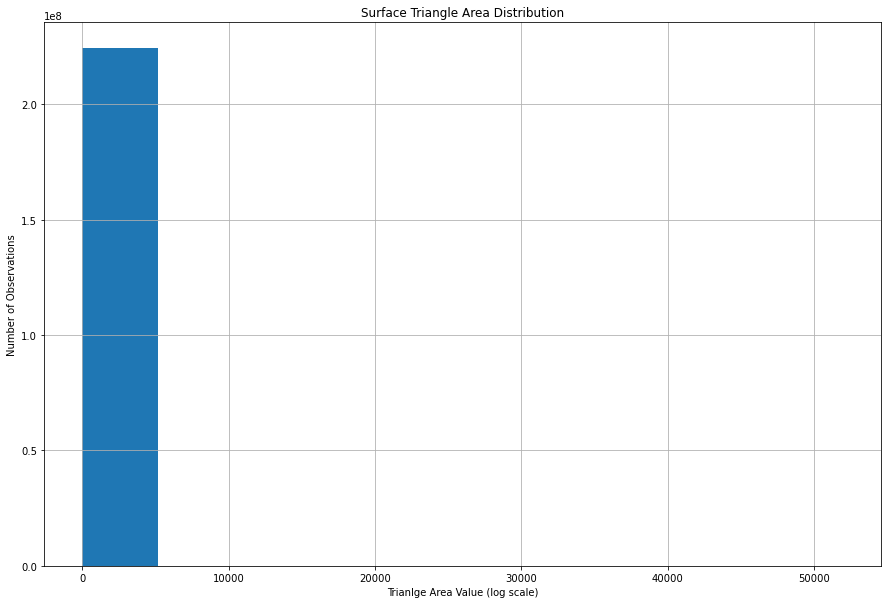

In [13]:
tri_areas.hist(figsize=(15,10))
plt.title("Surface Triangle Area Distribution")
plt.ylabel("Number of Observations")
plt.xlabel("Trianlge Area Value (log scale)")

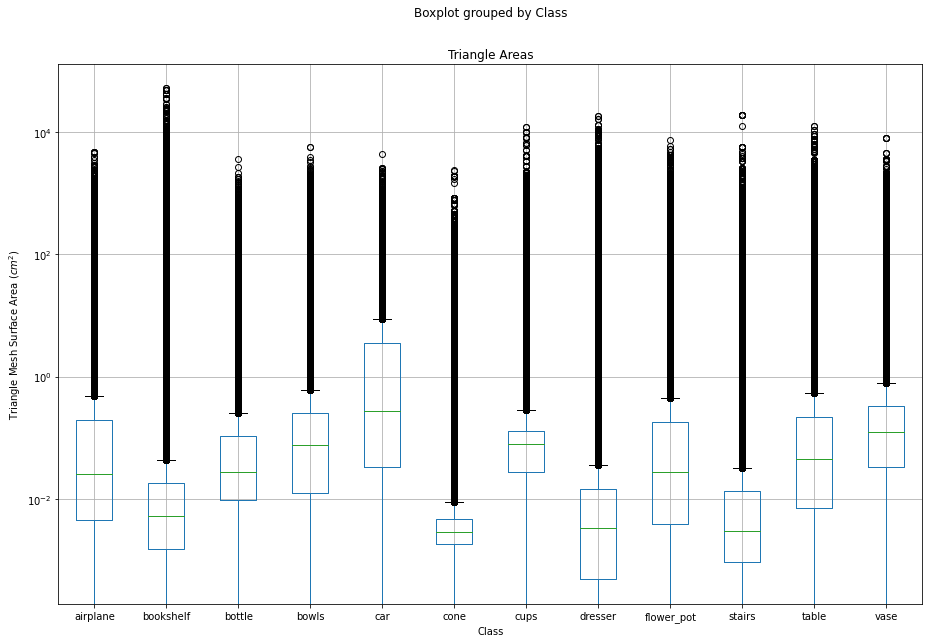

In [14]:
# get the distribution of the triangle areas
# plt.figure(figsize=(15,10))
tri_areas.boxplot(column='Triangle Areas', by="Class", figsize=(15,10))
# plt.gca().axes.get_xaxis().set_visible(False)
plt.yscale('log')
plt.ylabel("Triangle Mesh Surface Area ($cm^2$)")
plt.xlabel("Class")
pylab.show()

In [15]:
# # get the distribution of the triangle areas
# # tri_areas.violinplot(column='Areas', by="Class")
# sns.violinplot(tri_areas)
# plt.gca().title("")
# plt.yscale('log')
# plt.ylabel("Triangle Mesh Surface Area ($cm^2$)")
# plt.xlabel("Class")
# plt.title("Surface Area of Thingiverse STL Triangles")
# pylab.show()

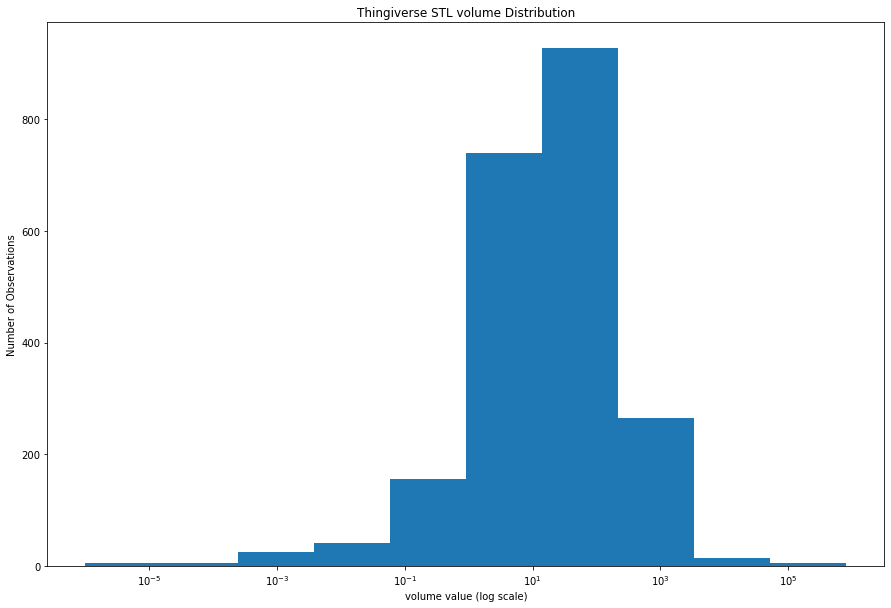

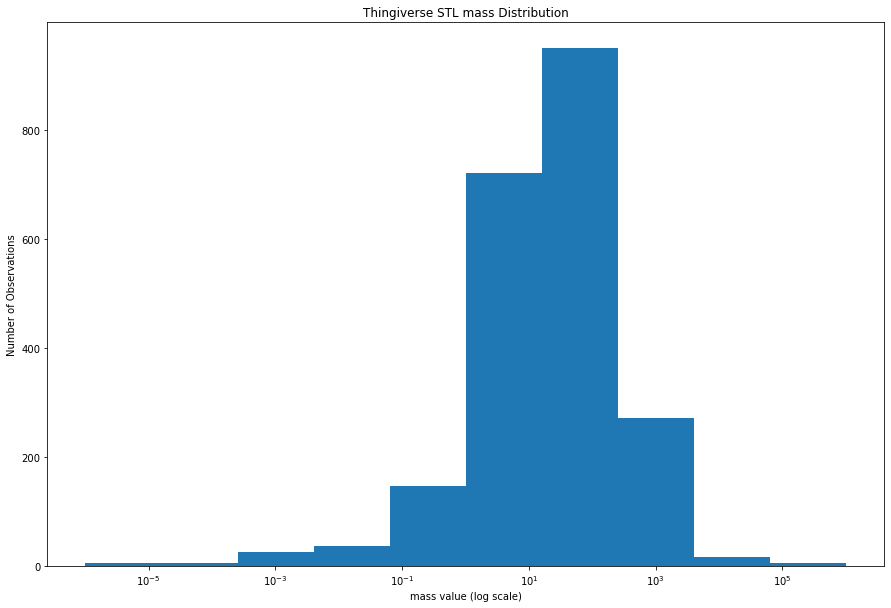

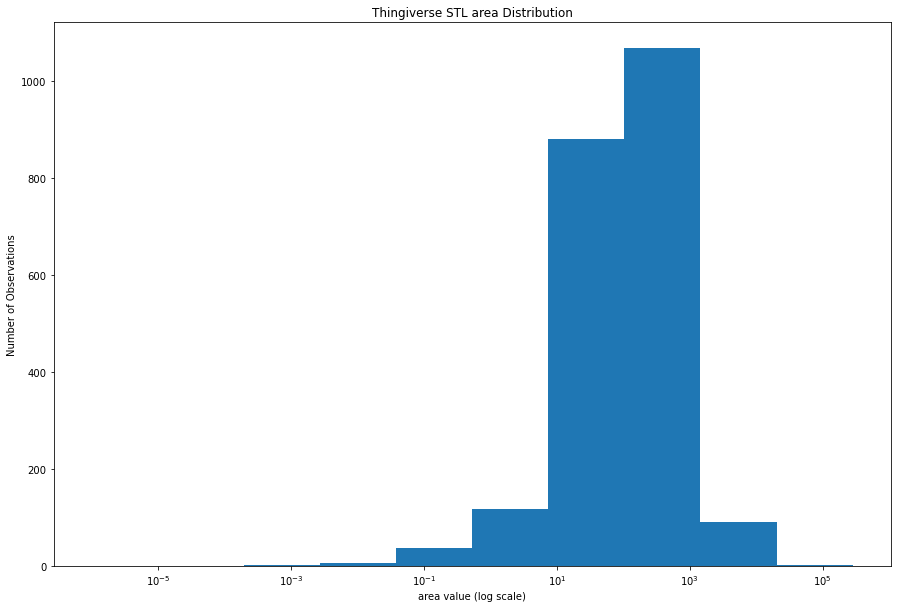

In [16]:
for col in df.columns[1:]:
    hist, bins = np.histogram(abs(df[col]), bins=10)
    logbins = np.logspace(np.log10(bins[0]+0.000001),np.log10(bins[-1]),len(bins))
    plt.figure(figsize=(15,10))
    plt.hist(df[col], bins=logbins)
    plt.title("Thingiverse STL " + col + " Distribution")
    plt.ylabel("Number of Observations")
    plt.xlabel(col + " value (log scale)")
    plt.xscale('log')
    plt.show()

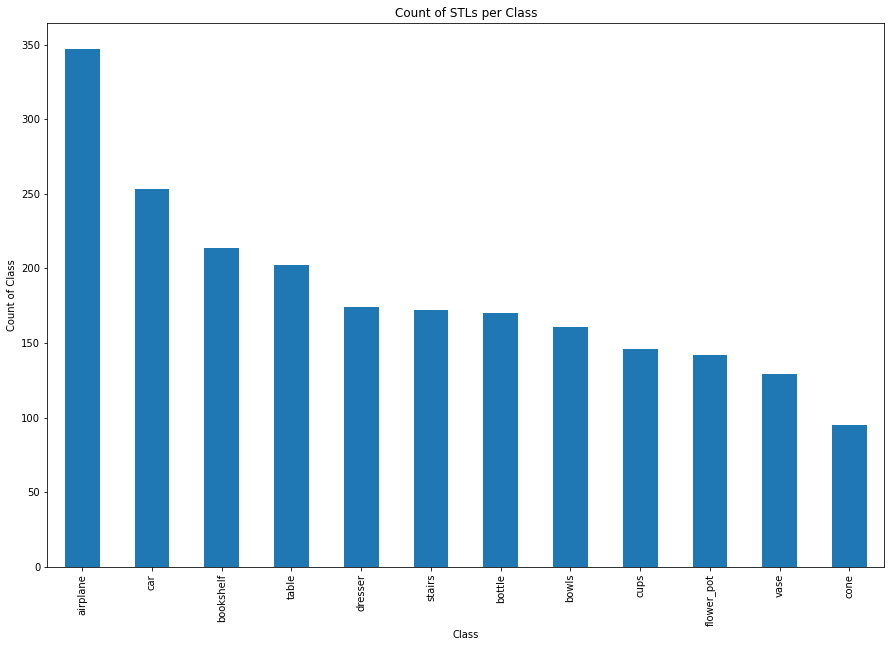

In [17]:
# get the distribution of classes
fig = plt.figure()
df['class'].value_counts().plot(kind='bar', figsize=(15,10))
plt.xlabel("Class")
plt.ylabel("Count of Class")
plt.title("Count of STLs per Class")
plt.show()

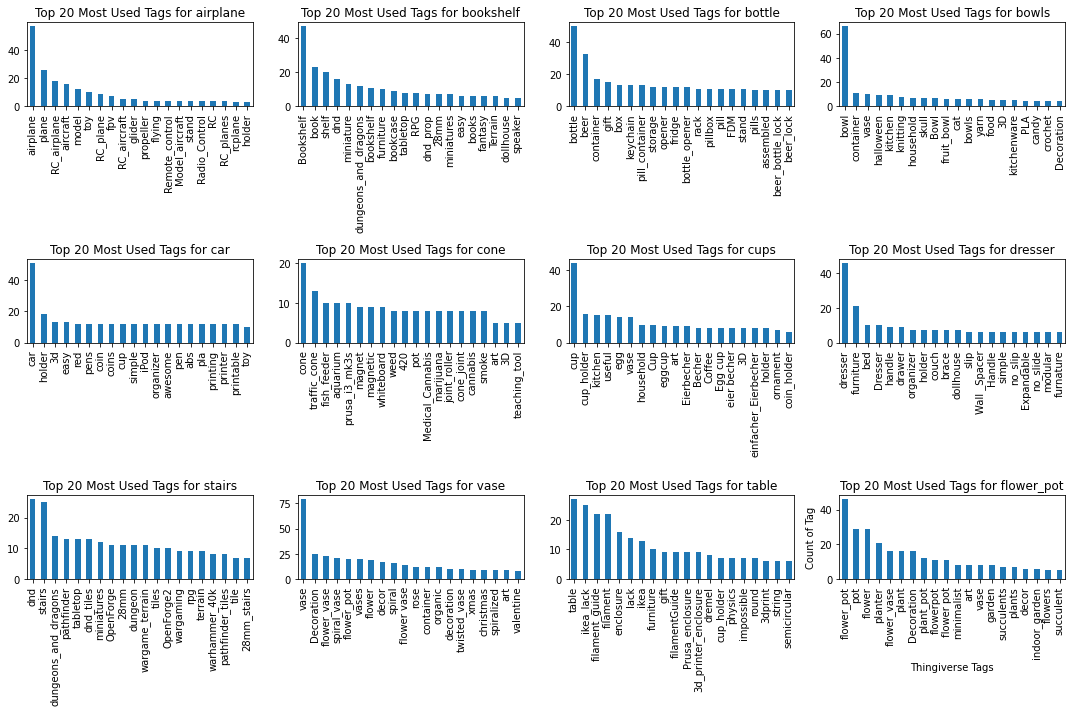

In [28]:
# get a barplot of the tags
fig, axs = plt.subplots(3, 4, figsize=(15,10))
for i,name in enumerate(names[:]):
    ax = axs.ravel()[i]
    pd.Series(t for t in all_tags[name] if t.strip() != '').value_counts()[:20].plot(kind='bar', ax=ax)
    ax.set_title("Top 20 Most Used Tags for "+name)
plt.xlabel("Thingiverse Tags")
plt.ylabel("Count of Tag")
plt.tight_layout()
plt.show()

In [1]:
# Get the violin plot of the volume
fig = plt.figure()
# sns.violinplot(x=df['volume'])
# plt.xscale('log')
# plt.gca().axes.get_yaxis().set_visible(False)
df.hist(column='volume')
plt.xlabel("Volume ($cm^3$)")
plt.ylabel("Frequency")
plt.title("Volume of Thingiverse STLs")
plt.show()

NameError: name 'plt' is not defined

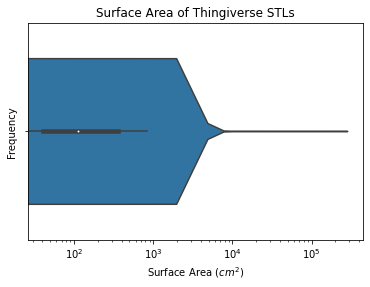

In [20]:
# get a violin plot of the surface areas
fig = plt.figure()
sns.violinplot(x=df['area'])
# plt.gca().axes.get_xaxis().set_visible(False)
plt.xscale('log')
plt.xlabel("Surface Area ($cm^2$)")
plt.ylabel("Frequency")
plt.title("Surface Area of Thingiverse STLs")
plt.show()

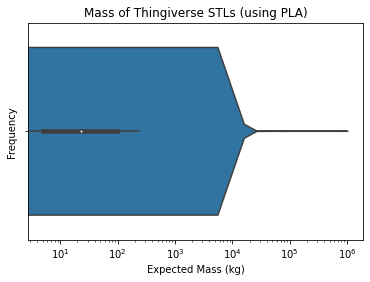

In [21]:
# get a violin plot of the Mass
fig = plt.figure()
sns.violinplot(x=df['mass'])
# plt.gca().axes.get_xaxis().set_visible(False)
plt.xscale('log')
plt.xlabel("Expected Mass (kg)")
plt.ylabel("Frequency")
plt.title("Mass of Thingiverse STLs (using PLA)")
plt.show()

In [22]:
tri_pts = pd.DataFrame(columns = ['Class', 'X', 'Y', 'Z'])
for key, value in all_tris.items():
#     vals = np.unique(np.array(value).reshape(-1,3), axis=0)
#     vals = np.array(value).reshape(-1,3)
#     x = vals[:,0]
#     y = vals[:,1]
#     z = vals[:,2]
#     cur_df = pd.DataFrame({'X':x, 'Y':y, 'Z':z})
    cur_df = pd.DataFrame(np.array(value).reshape(-1,3), columns=['X','Y','Z'])
    cur_df['Class'] = key
    tri_pts = tri_pts.append(cur_df, ignore_index = True)

In [23]:
tri_pts.head()

,Class,X,Y,Z
0,airplane,-48.168900,-556.433228,262.0
1,airplane,-48.597099,-560.250488,267.0
2,airplane,-48.229919,-560.250488,262.0
3,airplane,-48.229919,-560.250488,262.0
4,airplane,-48.597099,-560.250488,267.0


In [24]:
tri_pts.describe().T

,count,mean,std,min,25%,50%,75%,max
X,673251420.0,51.983957,299.406984,-1260.844849,-10.862483,11.786585,43.436001,47258.824219
Y,673251420.0,22.171054,166.643292,-2255.997803,-11.645494,8.658835,40.456631,46411.863281
Z,673251420.0,39.775096,165.244964,-3557.038330,4.700470,18.361500,52.037594,1432.030029


array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>],
       [<AxesSubplot:title={'center':'Z'}>, <AxesSubplot:>]], dtype=object)

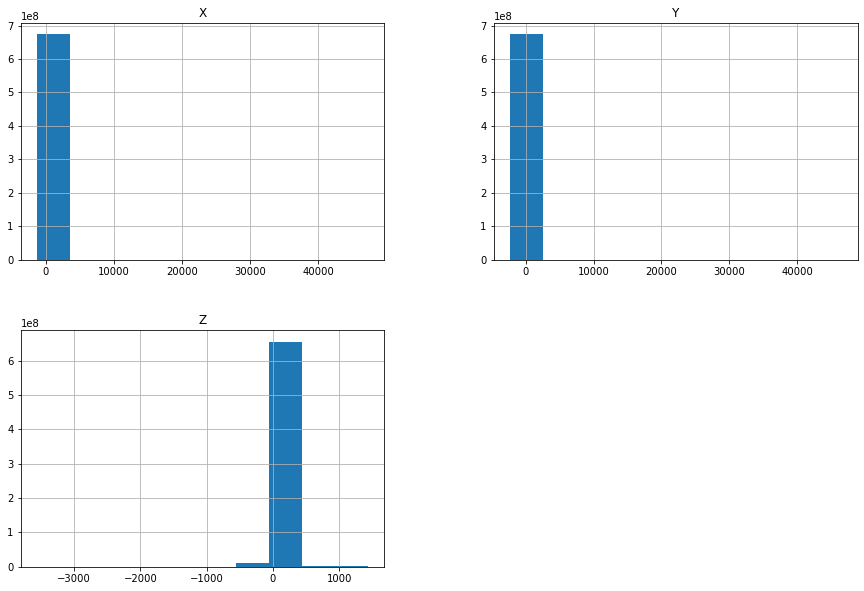

In [25]:
tri_pts.hist(figsize=(15,10))

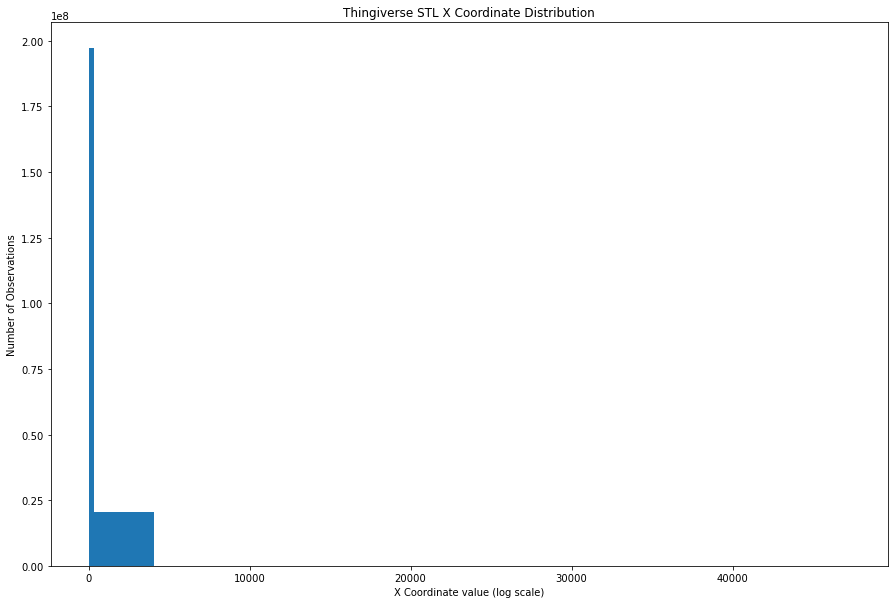

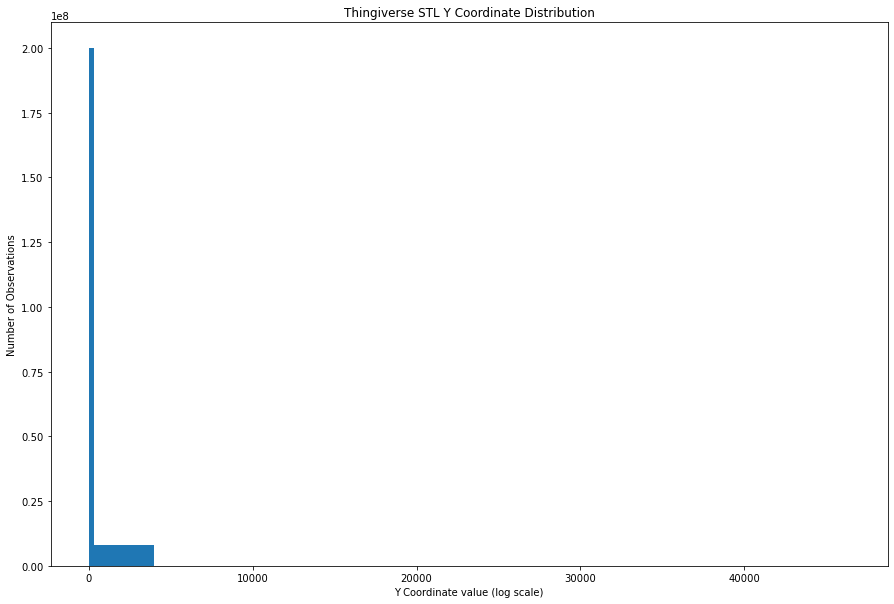

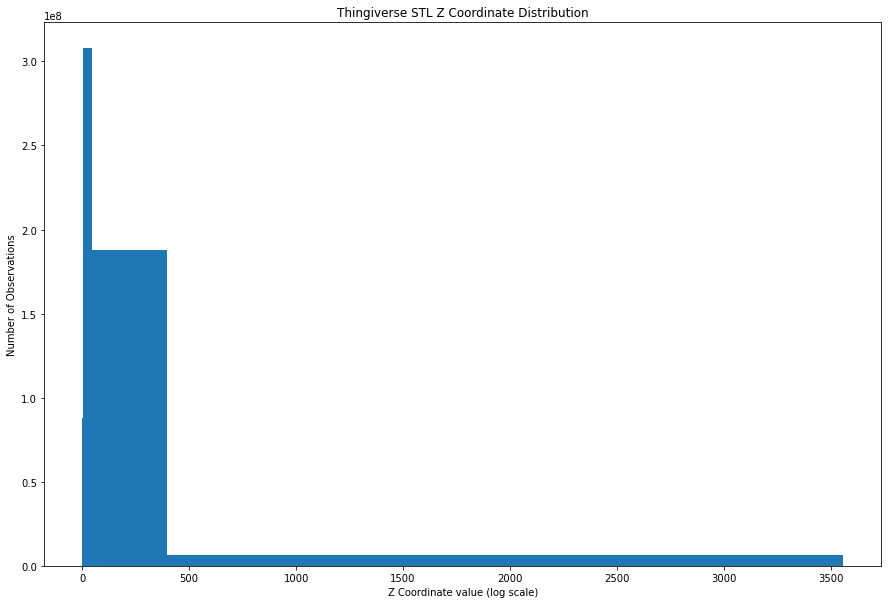

In [26]:
for col in tri_pts.columns[1:]:
    hist, bins = np.histogram(abs(tri_pts[col]), bins=10)
    logbins = np.logspace(np.log10(bins[0]+0.000001),np.log10(bins[-1]),len(bins))
    plt.figure(figsize=(15,10))
    plt.hist(tri_pts[col], bins=logbins)
    plt.title("Thingiverse STL " + col + " Coordinate Distribution")
    plt.ylabel("Number of Observations")
    plt.xlabel(col + " Coordinate value (log scale)")
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


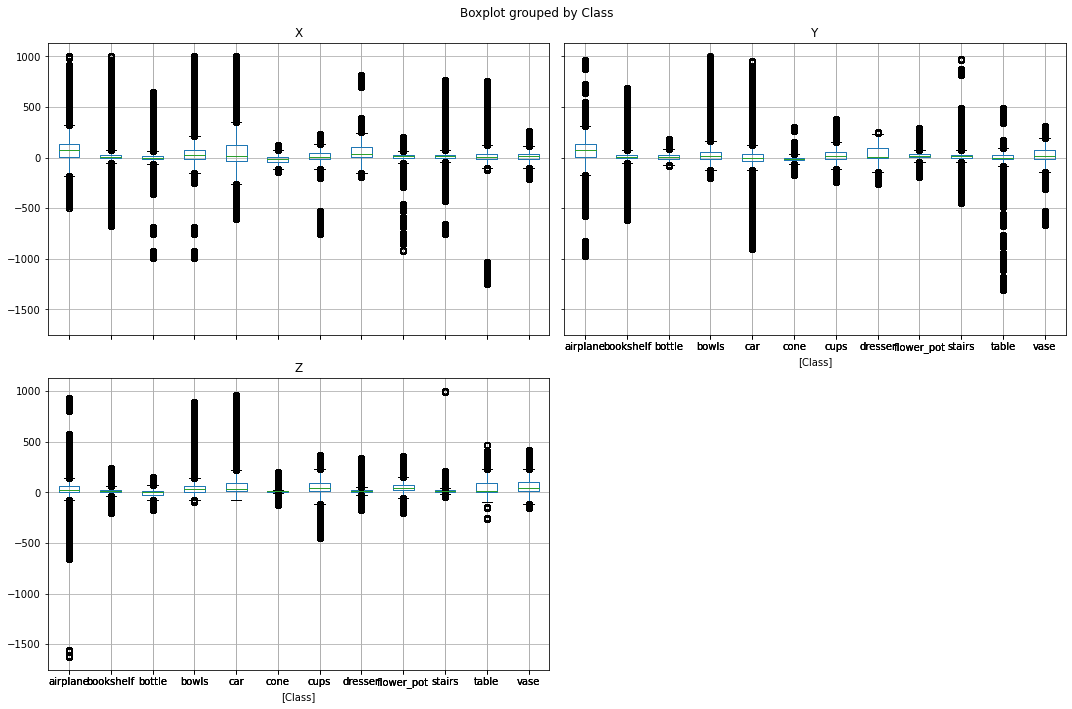

In [29]:
# get the distribution of the triangle areas
# plt.figure(figsize=(15,10))
tri_pts[(tri_pts['Z']<1000) & (tri_pts['X']<1000) & (tri_pts['Y']<1000)].boxplot(by="Class", figsize=(15,10))
# plt.gca().axes.get_xaxis().set_visible(False)
plt.ylabel("Triangle Coordinate Value")
plt.xlabel("Class")
plt.tight_layout()
pylab.show()

In [ ]:
def plot_name(name):
    # get a barplot of the tags
    fig = plt.figure()
    ax = pd.Series(all_tags['airplane']).value_counts()[:40].plot(kind='bar')
    ax.set_xlabel("Thingiverse Tags")
    ax.set_ylabel("Count of Tag")
    ax.set_title("Count of Tags per Thingiverse STL")
    plt.show()
    
    # get the distribution of the triangle areas
    util = STLUtils()
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    ax.violinplot(all_area['airplane'])
    ax.get_xaxis().set_visible(False)
    ax.set_yscale('log')
    ax.set_ylabel("Triangle Mesh Surface Area ($cm^2$)")
    ax.set_title("Surface Area of Thingiverse STL Triangles")
    plt.show()

In [ ]:
# partition = 'thingiverse'
# df = pd.DataFrame()

# for name in names:
#     stls = glob.glob(os.path.join(DATA_DIR,partition,name,'**','*.stl'), recursive=True)
#     for stl in stls:
#         try:
#             (v,m,a) = read_stl(stl)
#             entry = pd.DataFrame({'class':name, 'path':stl, 'volume':v, 'mass':m, 'area':a}, index=[0])
#             df = pd.concat([df, entry], ignore_index=True)
#         except Exception as e:
#             print(e)
#             pass
        
# df.to_csv(DATA_DIR+'/'+partition+'_stats.csv')

In [ ]:
# def read_stl(filename, material=2, unit='cm'):
#     mySTLUtils = STLUtils()
#     mySTLUtils.loadSTL(filename)
#     material_mass = materialsFor3DPrinting().get_material_mass(material)
#     v = mySTLUtils.volume(unit, material_mass)
#     m = mySTLUtils.mass(unit, material_mass)
#     a = mySTLUtils.area()
#     pts = mySTLUtils.triangles
#     return v,m,a,pts